# Tree Kernel

In [1]:
from nltk.tree import Tree
import numpy as np
tree = Tree.fromstring('( NN-textualorganization ( EDU 1 )  ( SN-purpose ( NS-elaboration ( EDU 2 )  ( NS-temporal ( EDU 3 )  ( EDU 4 )  )  )  ( NS-elaboration ( NS-elaboration ( EDU 5 )  ( EDU 6 )  )  ( EDU 7 )  )  )  )')

### prune tree

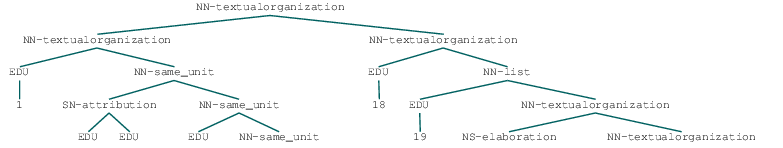

In [90]:
def prune_aux(tree,cut,i):
    if(type(tree)==str and cut>i):
        return '('+tree+')'
    try:
        if(cut>i):
            return '('+tree.label()+'\n\t'+prune_aux(tree[0],cut,i+1)+prune_aux(tree[1],cut,i+1)+')'
        else:
            return ''
    except:
        return '('+tree.label()+'\n\t'+prune_aux(tree[0],cut,i+1)+')'

def prune(tree,max_height=10):
    s = prune_aux(tree,max_height,0)
    return Tree.fromstring(s)
tree = Tree.fromstring('(NN-textualorganization  (NN-textualorganization    (EDU 1)    (NN-same_unit      (SN-attribution (EDU 2) (EDU 3))      (NN-same_unit        (EDU 4)        (NN-same_unit          (EDU 5)          (NN-same_unit            (NS-elaboration (EDU 6) (EDU 7))            (NN-same_unit              (NN-same_unit                (NS-elaboration (EDU 8) (EDU 9))                (NN-textualorganization                  (EDU 10)                  (NS-elaboration (EDU 11) (EDU 12))))              (NN-same_unit                (NS-circumstance (EDU 13) (EDU 14))                (NN-same_unit                  (NS-elaboration (EDU 15) (EDU 16))                  (EDU 17)))))))))  (NN-textualorganization    (EDU 18)    (NN-list      (EDU 19)      (NN-textualorganization        (NS-elaboration (EDU 20) (NS-elaboration (EDU 21) (EDU 22)))        (NN-textualorganization          (NS-elaboration            (NS-elaboration              (EDU 23)              (NS-elaboration (EDU 24) (NN-list (EDU 25) (EDU 26))))            (EDU 27))          (NS-elaboration            (EDU 28)            (NN-textualorganization              (EDU 29)              (NN-textualorganization                (EDU 30)                (NN-textualorganization                  (EDU 31)                  (NN-textualorganization                    (NS-elaboration (EDU 32) (EDU 33))                    (NN-textualorganization                      (EDU 34)                      (NN-textualorganization                        (NS-elaboration (EDU 35) (EDU 36))                        (NN-textualorganization                          (NS-purpose (EDU 37) (EDU 38))                          (NN-textualorganization                            (EDU 39)                            (NN-textualorganization                              (EDU 40)                              (NN-textualorganization                                (EDU 41)                                (NN-textualorganization                                  (EDU 42)                                  (NS-temporal                                    (NS-condition                                      (EDU 43)                                      (NS-purpose                                        (EDU 44)                                        (NS-elaboration                                          (EDU 45)                                          (EDU 46))))                                    (NN-same_unit                                      (NS-circumstance                                        (EDU 47)                                        (EDU 48))                                      (NN-textualorganization                                        (NN-textualorganization                                          (EDU 49)                                          (EDU 50))                                        (NN-textualorganization                                          (EDU 51)                                          (NN-textualorganization                                            (SN-attribution                                              (EDU 52)                                              (SN-attribution                                                (EDU 53)                                                (EDU 54)))                                            (NN-textualorganization                                              (NS-purpose                                                (EDU 55)                                                (NN-same_unit                                                  (NN-same_unit                                                    (NS-elaboration                                                      (EDU 56)                                                      (EDU 57))                                                    (EDU 58))                                                  (SN-circumstance                                                    (EDU 59)                                                    (NS-elaboration                                                      (EDU 60)                                                      (EDU 61)))))                                              (NN-textualorganization                                                (NS-elaboration                                                  (EDU 62)                                                  (EDU 63))                                                (NN-list                                                  (NN-textualorganization                                                    (NN-same_unit                                                      (NS-elaboration                                                        (EDU 64)                                                        (EDU 65))                                                      (EDU 66))                                                    (NS-elaboration                                                      (NS-elaboration                                                        (EDU 67)                                                        (EDU 68))                                                      (EDU 69)))                                                  (NN-same_unit                                                    (NS-purpose                                                      (EDU 70)                                                      (SN-attribution                                                        (EDU 71)                                                        (EDU 72)))                                                    (NN-textualorganization                                                      (NN-list                                                        (EDU 73)                                                        (NS-condition                                                          (EDU 74)                                                          (EDU 75)))                                                      (NN-textualorganization                                                        (NS-attribution                                                          (EDU 76)                                                          (EDU 77))                                                        (NN-textualorganization                                                          (EDU 78)                                                          (NN-textualorganization                                                            (EDU 79)                                                            (NN-same_unit                                                              (NS-purpose                                                                (EDU                                                                  80)                                                                (SN-antithesis                                                                  (EDU                                                                    81)                                                                  (EDU                                                                    82)))                                                              (NN-textualorganization                                                                (EDU                                                                  83)                                                                (NN-textualorganization                                                                  (EDU                                                                    84)                                                                  (NN-textualorganization                                                                    (NS-condition                                                                      (EDU                                                                        85)                                                                      (EDU                                                                        86))                                                                    (NN-textualorganization                                                                      (NN-same_unit                                                                        (NS-elaboration                                                                          (EDU                                                                            87)                                                                          (EDU                                                                            88))                                                                        (EDU                                                                          89))                                                                      (NN-textualorganization                                                                        (NN-same_unit                                                                          (NS-elaboration                                                                            (EDU                                                                              90)                                                                            (EDU                                                                              91))                                                                          (NN-textualorganization                                                                            (EDU                                                                              92)                                                                            (NS-elaboration                                                                              (NS-elaboration                                                                                (EDU                                                                                  93)                                                                                (EDU                                                                                  94))                                                                              (NS-elaboration                                                                                (EDU                                                                                  95)                                                                                (NN-textualorganization                                                                                  (NN-same_unit                                                                                    (EDU                                                                                      96)                                                                                    (EDU                                                                                      97))                                                                                  (NS-elaboration                                                                                    (EDU                                                                                      98)                                                                                    (NS-elaboration                                                                                      (EDU                                                                                        99)                                                                                      (NN-textualorganization                                                                                        (EDU                                                                                          100)                                                                                        (NS-elaboration                                                                                          (NS-circumstance                                                                                            (EDU                                                                                              101)                                                                                            (EDU                                                                                              102))                                                                                          (NN-textualorganization                                                                                            (EDU                                                                                              103)                                                                                            (NN-textualorganization                                                                                              (EDU                                                                                                104)                                                                                              (NS-elaboration                                                                                                (EDU                                                                                                  105)                                                                                                (NS-attribution                                                                                                  (NN-textualorganization                                                                                                    (EDU                                                                                                      106)                                                                                                    (NS-circumstance                                                                                                      (EDU                                                                                                        107)                                                                                                      (EDU                                                                                                        108)))                                                                                                  (NS-elaboration                                                                                                    (EDU                                                                                                      109)                                                                                                    (NS-elaboration                                                                                                      (EDU                                                                                                        110)                                                                                                      (NS-elaboration                                                                                                        (EDU                                                                                                          111)                                                                                                        (NN-textualorganization                                                                                                          (EDU                                                                                                            112)                                                                                                          (NS-elaboration                                                                                                            (NS-elaboration                                                                                                              (NS-elaboration                                                                                                                (EDU                                                                                                                  113)                                                                                                                (EDU                                                                                                                  114))                                                                                                              (NS-condition                                                                                                                (EDU                                                                                                                  115)                                                                                                                (NS-elaboration                                                                                                                  (EDU                                                                                                                    116)                                                                                                                  (EDU                                                                                                                    117))))                                                                                                            (NN-textualorganization                                                                                                              (SN-attribution                                                                                                                (EDU                                                                                                                  118)                                                                                                                (NN-same_unit                                                                                                                  (NS-elaboration                                                                                                                    (EDU                                                                                                                      119)                                                                                                                    (EDU                                                                                                                      120))                                                                                                                  (NN-same_unit                                                                                                                    (NS-elaboration                                                                                                                      (EDU                                                                                                                        121)                                                                                                                      (EDU                                                                                                                        122))                                                                                                                    (NN-list                                                                                                                      (EDU                                                                                                                        123)                                                                                                                      (NS-attribution                                                                                                                        (EDU                                                                                                                          124)                                                                                                                        (EDU                                                                                                                          125))))))                                                                                                              (NS-elaboration                                                                                                                (EDU                                                                                                                  126)                                                                                                                (NN-textualorganization                                                                                                                  (NN-same_unit                                                                                                                    (NS-condition                                                                                                                      (EDU                                                                                                                        127)                                                                                                                      (EDU                                                                                                                        128))                                                                                                                    (NS-manner                                                                                                                      (EDU                                                                                                                        129)                                                                                                                      (EDU                                                                                                                        130)))                                                                                                                  (NN-textualorganization                                                                                                                    (NS-elaboration                                                                                                                      (EDU                                                                                                                        131)                                                                                                                      (EDU                                                                                                                        132))                                                                                                                    (NS-elaboration                                                                                                                      (EDU                                                                                                                        133)                                                                                                                      (NS-elaboration                                                                                                                        (NN-same_unit                                                                                                                          (NS-purpose                                                                                                                            (EDU                                                                                                                              134)                                                                                                                            (EDU                                                                                                                              135))                                                                                                                          (SN-attribution                                                                                                                            (EDU                                                                                                                              136)                                                                                                                            (EDU                                                                                                                              137)))                                                                                                                        (NS-elaboration                                                                                                                          (NS-elaboration                                                                                                                            (EDU                                                                                                                              138)                                                                                                                            (NN-list                                                                                                                              (EDU                                                                                                                                139)                                                                                                                              (NS-circumstance                                                                                                                                (EDU                                                                                                                                  140)                                                                                                                                (EDU                                                                                                                                  141))))                                                                                                                          (NS-elaboration                                                                                                                            (NN-same_unit                                                                                                                              (NN-list                                                                                                                                (EDU                                                                                                                                  142)                                                                                                                                (EDU                                                                                                                                  143))                                                                                                                              (NS-elaboration                                                                                                                                (EDU                                                                                                                                  144)                                                                                                                                (NS-circumstance                                                                                                                                  (EDU                                                                                                                                    145)                                                                                                                                  (EDU                                                                                                                                    146))))                                                                                                                            (NN-textualorganization                                                                                                                              (NS-elaboration                                                                                                                                (EDU                                                                                                                                  147)                                                                                                                                (EDU                                                                                                                                  148))                                                                                                                              (SN-attribution                                                                                                                                (NS-purpose                                                                                                                                  (EDU                                                                                                                                    149)                                                                                                                                  (NS-elaboration                                                                                                                                    (EDU                                                                                                                                      150)                                                                                                                                    (EDU                                                                                                                                      151)))                                                                                                                                (NS-elaboration                                                                                                                                  (EDU                                                                                                                                    152)                                                                                                                                  (NS-elaboration                                                                                                                                    (NS-elaboration                                                                                                                                      (EDU                                                                                                                                        153)                                                                                                                                      (SN-attribution                                                                                                                                        (EDU                                                                                                                                          154)                                                                                                                                        (NS-purpose                                                                                                                                          (EDU                                                                                                                                            155)                                                                                                                                          (EDU                                                                                                                                            156))))                                                                                                                                    (NS-elaboration                                                                                                                                      (NS-elaboration                                                                                                                                        (EDU                                                                                                                                          157)                                                                                                                                        (EDU                                                                                                                                          158))                                                                                                                                      (NS-elaboration                                                                                                                                        (NS-elaboration                                                                                                                                          (EDU                                                                                                                                            159)                                                                                                                                          (NS-elaboration                                                                                                                                            (EDU                                                                                                                                              160)                                                                                                                                            (EDU                                                                                                                                              161)))                                                                                                                                        (NS-elaboration                                                                                                                                          (EDU                                                                                                                                            162)                                                                                                                                          (NS-elaboration                                                                                                                                            (NS-elaboration                                                                                                                                              (EDU                                                                                                                                                163)                                                                                                                                              (EDU                                                                                                                                                164))                                                                                                                                            (NS-elaboration                                                                                                                                              (SN-attribution                                                                                                                                                (EDU                                                                                                                                                  165)                                                                                                                                                (NS-circumstance                                                                                                                                                  (EDU                                                                                                                                                    166)                                                                                                                                                  (EDU                                                                                                                                                    167)))                                                                                                                                              (NS-condition                                                                                                                                                (EDU                                                                                                                                                  168)                                                                                                                                                (EDU                                                                                                                                                  169)))))))))))))))))))))))))))))))))))))                                                                        (NN-textualorganization                                                                          (EDU                                                                            170)                                                                          (NN-textualorganization                                                                            (NN-same_unit                                                                              (NS-elaboration                                                                                (EDU                                                                                  171)                                                                                (EDU                                                                                  172))                                                                              (EDU                                                                                173))                                                                            (NN-textualorganization                                                                              (EDU                                                                                174)                                                                              (NN-textualorganization                                                                                (EDU                                                                                  175)                                                                                (NN-same_unit                                                                                  (SN-attribution                                                                                    (EDU                                                                                      176)                                                                                    (EDU                                                                                      177))                                                                                  (NN-textualorganization                                                                                    (NN-textualorganization                                                                                      (EDU                                                                                        178)                                                                                      (EDU                                                                                        179))                                                                                    (NN-textualorganization                                                                                      (EDU                                                                                        180)                                                                                      (NN-textualorganization                                                                                        (EDU                                                                                          181)                                                                                        (NN-textualorganization                                                                                          (EDU                                                                                            182)                                                                                          (NN-textualorganization                                                                                            (NS-elaboration                                                                                              (EDU                                                                                                183)                                                                                              (NN-same_unit                                                                                                (NS-condition                                                                                                  (EDU                                                                                                    184)                                                                                                  (EDU                                                                                                    185))                                                                                                (NN-same_unit                                                                                                  (NS-attribution                                                                                                    (EDU                                                                                                      186)                                                                                                    (EDU                                                                                                      187))                                                                                                  (NN-same_unit                                                                                                    (NS-purpose                                                                                                      (EDU                                                                                                        188)                                                                                                      (EDU                                                                                                        189))                                                                                                    (EDU                                                                                                      190)))))                                                                                            (NN-textualorganization                                                                                              (NN-textualorganization                                                                                                (EDU                                                                                                  191)                                                                                                (NN-textualorganization                                                                                                  (EDU                                                                                                    192)                                                                                                  (NN-textualorganization                                                                                                    (EDU                                                                                                      193)                                                                                                    (NN-textualorganization                                                                                                      (EDU                                                                                                        194)                                                                                                      (NN-textualorganization                                                                                                        (EDU                                                                                                          195)                                                                                                        (NN-same_unit                                                                                                          (NS-attribution                                                                                                            (EDU                                                                                                              196)                                                                                                            (EDU                                                                                                              197))                                                                                                          (NS-elaboration                                                                                                            (NS-elaboration                                                                                                              (EDU                                                                                                                198)                                                                                                              (NS-elaboration                                                                                                                (EDU                                                                                                                  199)                                                                                                                (EDU                                                                                                                  200)))                                                                                                            (NN-textualorganization                                                                                                              (NS-elaboration                                                                                                                (EDU                                                                                                                  201)                                                                                                                (EDU                                                                                                                  202))                                                                                                              (NN-textualorganization                                                                                                                (EDU                                                                                                                  203)                                                                                                                (NN-textualorganization                                                                                                                  (EDU                                                                                                                    204)                                                                                                                  (NN-textualorganization                                                                                                                    (EDU                                                                                                                      205)                                                                                                                    (NN-textualorganization                                                                                                                      (EDU                                                                                                                        206)                                                                                                                      (NN-textualorganization                                                                                                                        (NN-textualorganization                                                                                                                          (EDU                                                                                                                            207)                                                                                                                          (EDU                                                                                                                            208))                                                                                                                        (NN-textualorganization                                                                                                                          (EDU                                                                                                                            209)                                                                                                                          (NN-textualorganization                                                                                                                            (EDU                                                                                                                              210)                                                                                                                            (NN-textualorganization                                                                                                                              (NN-same_unit                                                                                                                                (NN-textualorganization                                                                                                                                  (EDU                                                                                                                                    211)                                                                                                                                  (EDU                                                                                                                                    212))                                                                                                                                (NS-elaboration                                                                                                                                  (EDU                                                                                                                                    213)                                                                                                                                  (NS-elaboration                                                                                                                                    (EDU                                                                                                                                      214)                                                                                                                                    (EDU                                                                                                                                      215))))                                                                                                                              (NN-same_unit                                                                                                                                (SN-attribution                                                                                                                                  (EDU                                                                                                                                    216)                                                                                                                                  (EDU                                                                                                                                    217))                                                                                                                                (NN-textualorganization                                                                                                                                  (EDU                                                                                                                                    218)                                                                                                                                  (NN-same_unit                                                                                                                                    (NS-elaboration                                                                                                                                      (EDU                                                                                                                                        219)                                                                                                                                      (EDU                                                                                                                                        220))                                                                                                                                    (NS-purpose                                                                                                                                      (EDU                                                                                                                                        221)                                                                                                                                      (NS-elaboration                                                                                                                                        (EDU                                                                                                                                          222)                                                                                                                                        (EDU                                                                                                                                          223))))))))))))))))))))))                                                                                              (NN-textualorganization                                                                                                (EDU                                                                                                  224)                                                                                                (NN-textualorganization                                                                                                  (NN-same_unit                                                                                                    (NS-elaboration                                                                                                      (EDU                                                                                                        225)                                                                                                      (EDU                                                                                                        226))                                                                                                    (NS-circumstance                                                                                                      (EDU                                                                                                        227)                                                                                                      (NS-elaboration                                                                                                        (EDU                                                                                                          228)                                                                                                        (EDU                                                                                                          229))))                                                                                                  (NN-textualorganization                                                                                                    (NS-circumstance                                                                                                      (EDU                                                                                                        230)                                                                                                      (EDU                                                                                                        231))                                                                                                    (NN-textualorganization                                                                                                      (EDU                                                                                                        232)                                                                                                      (NN-textualorganization                                                                                                        (NS-purpose                                                                                                          (EDU                                                                                                            233)                                                                                                          (EDU                                                                                                            234))                                                                                                        (NN-textualorganization                                                                                                          (EDU                                                                                                            235)                                                                                                          (NN-textualorganization                                                                                                            (NS-elaboration                                                                                                              (EDU                                                                                                                236)                                                                                                              (EDU                                                                                                                237))                                                                                                            (NN-textualorganization                                                                                                              (NN-textualorganization                                                                                                                (EDU                                                                                                                  238)                                                                                                                (NS-purpose                                                                                                                  (EDU                                                                                                                    239)                                                                                                                  (EDU                                                                                                                    240)))                                                                                                              (NN-textualorganization                                                                                                                (NN-textualorganization                                                                                                                  (EDU                                                                                                                    241)                                                                                                                  (NN-same_unit                                                                                                                    (NS-elaboration                                                                                                                      (EDU                                                                                                                        242)                                                                                                                      (EDU                                                                                                                        243))                                                                                                                    (NS-elaboration                                                                                                                      (NS-purpose                                                                                                                        (EDU                                                                                                                          244)                                                                                                                        (EDU                                                                                                                          245))                                                                                                                      (EDU                                                                                                                        246))))                                                                                                                (NN-textualorganization                                                                                                                  (NS-elaboration                                                                                                                    (EDU                                                                                                                      247)                                                                                                                    (SN-attribution                                                                                                                      (EDU                                                                                                                        248)                                                                                                                      (NS-elaboration                                                                                                                        (EDU                                                                                                                          249)                                                                                                                        (EDU                                                                                                                          250))))                                                                                                                  (NN-textualorganization                                                                                                                    (NN-same_unit                                                                                                                      (SN-attribution                                                                                                                        (EDU                                                                                                                          251)                                                                                                                        (EDU                                                                                                                          252))                                                                                                                      (NN-same_unit                                                                                                                        (NS-elaboration                                                                                                                          (EDU                                                                                                                            253)                                                                                                                          (EDU                                                                                                                            254))                                                                                                                        (NN-same_unit                                                                                                                          (NS-elaboration                                                                                                                            (EDU                                                                                                                              255)                                                                                                                            (EDU                                                                                                                              256))                                                                                                                          (SN-attribution                                                                                                                            (EDU                                                                                                                              257)                                                                                                                            (NS-elaboration                                                                                                                              (EDU                                                                                                                                258)                                                                                                                              (EDU                                                                                                                                259))))))                                                                                                                    (NN-textualorganization                                                                                                                      (NN-same_unit                                                                                                                        (NS-attribution                                                                                                                          (NS-comparison                                                                                                                            (EDU                                                                                                                              260)                                                                                                                            (EDU                                                                                                                              261))                                                                                                                          (EDU                                                                                                                            262))                                                                                                                        (NN-same_unit                                                                                                                          (NS-circumstance                                                                                                                            (EDU                                                                                                                              263)                                                                                                                            (SN-attribution                                                                                                                              (EDU                                                                                                                                264)                                                                                                                              (NS-purpose                                                                                                                                (EDU                                                                                                                                  265)                                                                                                                                (EDU                                                                                                                                  266))))                                                                                                                          (NN-list                                                                                                                            (EDU                                                                                                                              267)                                                                                                                            (EDU                                                                                                                              268))))                                                                                                                      (NN-textualorganization                                                                                                                        (NN-same_unit                                                                                                                          (NN-same_unit                                                                                                                            (NN-textualorganization                                                                                                                              (EDU                                                                                                                                269)                                                                                                                              (EDU                                                                                                                                270))                                                                                                                            (NN-same_unit                                                                                                                              (NS-elaboration                                                                                                                                (EDU                                                                                                                                  271)                                                                                                                                (EDU                                                                                                                                  272))                                                                                                                              (SN-attribution                                                                                                                                (EDU                                                                                                                                  273)                                                                                                                                (EDU                                                                                                                                  274))))                                                                                                                          (NN-textualorganization                                                                                                                            (EDU                                                                                                                              275)                                                                                                                            (NN-same_unit                                                                                                                              (NS-elaboration                                                                                                                                (EDU                                                                                                                                  276)                                                                                                                                (EDU                                                                                                                                  277))                                                                                                                              (NN-same_unit                                                                                                                                (EDU                                                                                                                                  278)                                                                                                                                (SN-attribution                                                                                                                                  (EDU                                                                                                                                    279)                                                                                                                                  (NS-elaboration                                                                                                                                    (EDU                                                                                                                                      280)                                                                                                                                    (EDU                                                                                                                                      281)))))))                                                                                                                        (NN-textualorganization                                                                                                                          (NN-same_unit                                                                                                                            (NN-same_unit                                                                                                                              (EDU                                                                                                                                282)                                                                                                                              (NS-purpose                                                                                                                                (EDU                                                                                                                                  283)                                                                                                                                (EDU                                                                                                                                  284)))                                                                                                                            (NN-same_unit                                                                                                                              (SN-attribution                                                                                                                                (EDU                                                                                                                                  285)                                                                                                                                (NN-same_unit                                                                                                                                  (EDU                                                                                                                                    286)                                                                                                                                  (SN-condition                                                                                                                                    (EDU                                                                                                                                      287)                                                                                                                                    (EDU                                                                                                                                      288))))                                                                                                                              (NN-same_unit                                                                                                                                (NS-circumstance                                                                                                                                  (EDU                                                                                                                                    289)                                                                                                                                  (EDU                                                                                                                                    290))                                                                                                                                (NN-list                                                                                                                                  (EDU                                                                                                                                    291)                                                                                                                                  (EDU                                                                                                                                    292)))))                                                                                                                          (NN-textualorganization                                                                                                                            (EDU                                                                                                                              293)                                                                                                                            (NN-textualorganization                                                                                                                              (EDU                                                                                                                                294)                                                                                                                              (NN-textualorganization                                                                                                                                (NN-textualorganization                                                                                                                                  (EDU                                                                                                                                    295)                                                                                                                                  (NN-same_unit                                                                                                                                    (EDU                                                                                                                                      296)                                                                                                                                    (NN-textualorganization                                                                                                                                      (EDU                                                                                                                                        297)                                                                                                                                      (NN-same_unit                                                                                                                                        (NN-textualorganization                                                                                                                                          (EDU                                                                                                                                            298)                                                                                                                                          (SN-antithesis                                                                                                                                            (EDU                                                                                                                                              299)                                                                                                                                            (EDU                                                                                                                                              300)))                                                                                                                                        (NN-same_unit                                                                                                                                          (NS-elaboration                                                                                                                                            (EDU                                                                                                                                              301)                                                                                                                                            (EDU                                                                                                                                              302))                                                                                                                                          (NN-list                                                                                                                                            (EDU                                                                                                                                              303)                                                                                                                                            (EDU                                                                                                                                              304)))))))                                                                                                                                (NN-textualorganization                                                                                                                                  (NS-elaboration                                                                                                                                    (EDU                                                                                                                                      305)                                                                                                                                    (NN-same_unit                                                                                                                                      (NS-elaboration                                                                                                                                        (NS-attribution                                                                                                                                          (EDU                                                                                                                                            306)                                                                                                                                          (EDU                                                                                                                                            307))                                                                                                                                        (EDU                                                                                                                                          308))                                                                                                                                      (NN-textualorganization                                                                                                                                        (EDU                                                                                                                                          309)                                                                                                                                        (NS-elaboration                                                                                                                                          (EDU                                                                                                                                            310)                                                                                                                                          (NN-sequence                                                                                                                                            (NN-same_unit                                                                                                                                              (NS-elaboration                                                                                                                                                (EDU                                                                                                                                                  311)                                                                                                                                                (EDU                                                                                                                                                  312))                                                                                                                                              (NN-same_unit                                                                                                                                                (EDU                                                                                                                                                  313)                                                                                                                                                (NN-textualorganization                                                                                                                                                  (EDU                                                                                                                                                    314)                                                                                                                                                  (SN-attribution                                                                                                                                                    (EDU                                                                                                                                                      315)                                                                                                                                                    (EDU                                                                                                                                                      316)))))                                                                                                                                            (NS-elaboration                                                                                                                                              (NN-textualorganization                                                                                                                                                (EDU                                                                                                                                                  317)                                                                                                                                                (NN-same_unit                                                                                                                                                  (NS-elaboration                                                                                                                                                    (EDU                                                                                                                                                      318)                                                                                                                                                    (NS-purpose                                                                                                                                                      (EDU                                                                                                                                                        319)                                                                                                                                                      (EDU                                                                                                                                                        320)))                                                                                                                                                  (EDU                                                                                                                                                    321)))                                                                                                                                              (NS-elaboration                                                                                                                                                (NN-same_unit                                                                                                                                                  (NS-circumstance                                                                                                                                                    (EDU                                                                                                                                                      322)                                                                                                                                                    (EDU                                                                                                                                                      323))                                                                                                                                                  (SN-antithesis                                                                                                                                                    (EDU                                                                                                                                                      324)                                                                                                                                                    (EDU                                                                                                                                                      325)))                                                                                                                                                (NN-same_unit                                                                                                                                                  (NS-purpose                                                                                                                                                    (EDU                                                                                                                                                      326)                                                                                                                                                    (EDU                                                                                                                                                      327))                                                                                                                                                  (NS-attribution                                                                                                                                                    (EDU                                                                                                                                                      328)                                                                                                                                                    (NS-elaboration                                                                                                                                                      (EDU                                                                                                                                                        329)                                                                                                                                                      (NN-textualorganization                                                                                                                                                        (EDU                                                                                                                                                          330)                                                                                                                                                        (NS-elaboration                                                                                                                                                          (EDU                                                                                                                                                            331)                                                                                                                                                          (NS-elaboration                                                                                                                                                            (EDU                                                                                                                                                              332)                                                                                                                                                            (SN-attribution                                                                                                                                                              (NN-same_unit                                                                                                                                                                (NN-list                                                                                                                                                                  (EDU                                                                                                                                                                    333)                                                                                                                                                                  (EDU                                                                                                                                                                    334))                                                                                                                                                                (EDU                                                                                                                                                                  335))                                                                                                                                                              (NN-textualorganization                                                                                                                                                                (NS-elaboration                                                                                                                                                                  (EDU                                                                                                                                                                    336)                                                                                                                                                                  (NS-purpose                                                                                                                                                                    (EDU                                                                                                                                                                      337)                                                                                                                                                                    (NS-elaboration                                                                                                                                                                      (EDU                                                                                                                                                                        338)                                                                                                                                                                      (EDU                                                                                                                                                                        339))))                                                                                                                                                                (NS-elaboration                                                                                                                                                                  (NN-same_unit                                                                                                                                                                    (NS-elaboration                                                                                                                                                                      (EDU                                                                                                                                                                        340)                                                                                                                                                                      (EDU                                                                                                                                                                        341))                                                                                                                                                                    (NS-purpose                                                                                                                                                                      (EDU                                                                                                                                                                        342)                                                                                                                                                                      (EDU                                                                                                                                                                        343)))                                                                                                                                                                  (NS-elaboration                                                                                                                                                                    (EDU                                                                                                                                                                      344)                                                                                                                                                                    (NS-elaboration                                                                                                                                                                      (EDU                                                                                                                                                                        345)                                                                                                                                                                      (NS-elaboration                                                                                                                                                                        (NN-same_unit                                                                                                                                                                          (NS-elaboration                                                                                                                                                                            (EDU                                                                                                                                                                              346)                                                                                                                                                                            (EDU                                                                                                                                                                              347))                                                                                                                                                                          (NN-textualorganization                                                                                                                                                                            (EDU                                                                                                                                                                              348)                                                                                                                                                                            (NS-purpose                                                                                                                                                                              (EDU                                                                                                                                                                                349)                                                                                                                                                                              (SN-attribution                                                                                                                                                                                (EDU                                                                                                                                                                                  350)                                                                                                                                                                                (EDU                                                                                                                                                                                  351)))))                                                                                                                                                                        (NS-elaboration                                                                                                                                                                          (NS-purpose                                                                                                                                                                            (EDU                                                                                                                                                                              352)                                                                                                                                                                            (SN-attribution                                                                                                                                                                              (EDU                                                                                                                                                                                353)                                                                                                                                                                              (EDU                                                                                                                                                                                354)))                                                                                                                                                                          (NS-elaboration                                                                                                                                                                            (EDU                                                                                                                                                                              355)                                                                                                                                                                            (SN-attribution                                                                                                                                                                              (NN-same_unit                                                                                                                                                                                (NS-elaboration                                                                                                                                                                                  (EDU                                                                                                                                                                                    356)                                                                                                                                                                                  (EDU                                                                                                                                                                                    357))                                                                                                                                                                                (NS-attribution                                                                                                                                                                                  (EDU                                                                                                                                                                                    358)                                                                                                                                                                                  (EDU                                                                                                                                                                                    359)))                                                                                                                                                                              (NS-elaboration                                                                                                                                                                                (NS-purpose                                                                                                                                                                                  (EDU                                                                                                                                                                                    360)                                                                                                                                                                                  (NS-elaboration                                                                                                                                                                                    (EDU                                                                                                                                                                                      361)                                                                                                                                                                                    (NS-circumstance                                                                                                                                                                                      (EDU                                                                                                                                                                                        362)                                                                                                                                                                                      (EDU                                                                                                                                                                                        363))))                                                                                                                                                                                (NS-elaboration                                                                                                                                                                                  (NN-same_unit                                                                                                                                                                                    (SN-attribution                                                                                                                                                                                      (EDU                                                                                                                                                                                        364)                                                                                                                                                                                      (EDU                                                                                                                                                                                        365))                                                                                                                                                                                    (NS-purpose                                                                                                                                                                                      (EDU                                                                                                                                                                                        366)                                                                                                                                                                                      (NS-purpose                                                                                                                                                                                        (EDU                                                                                                                                                                                          367)                                                                                                                                                                                        (NS-purpose                                                                                                                                                                                          (EDU                                                                                                                                                                                            368)                                                                                                                                                                                          (EDU                                                                                                                                                                                            369)))))                                                                                                                                                                                  (NS-elaboration                                                                                                                                                                                    (EDU                                                                                                                                                                                      370)                                                                                                                                                                                    (NN-textualorganization                                                                                                                                                                                      (EDU                                                                                                                                                                                        371)                                                                                                                                                                                      (NS-elaboration                                                                                                                                                                                        (EDU                                                                                                                                                                                          372)                                                                                                                                                                                        (NS-elaboration                                                                                                                                                                                          (NS-elaboration                                                                                                                                                                                            (EDU                                                                                                                                                                                              373)                                                                                                                                                                                            (NS-purpose                                                                                                                                                                                              (EDU                                                                                                                                                                                                374)                                                                                                                                                                                              (EDU                                                                                                                                                                                                375)))                                                                                                                                                                                          (NS-elaboration                                                                                                                                                                                            (EDU                                                                                                                                                                                              376)                                                                                                                                                                                            (NS-elaboration                                                                                                                                                                                              (NS-condition                                                                                                                                                                                                (EDU                                                                                                                                                                                                  377)                                                                                                                                                                                                (SN-condition                                                                                                                                                                                                  (EDU                                                                                                                                                                                                    378)                                                                                                                                                                                                  (NS-purpose                                                                                                                                                                                                    (EDU                                                                                                                                                                                                      379)                                                                                                                                                                                                    (EDU                                                                                                                                                                                                      380))))                                                                                                                                                                                              (NN-textualorganization                                                                                                                                                                                                (EDU                                                                                                                                                                                                  381)                                                                                                                                                                                                (SN-attribution                                                                                                                                                                                                  (EDU                                                                                                                                                                                                    382)                                                                                                                                                                                                  (NS-elaboration                                                                                                                                                                                                    (NS-elaboration                                                                                                                                                                                                      (EDU                                                                                                                                                                                                        383)                                                                                                                                                                                                      (NN-same_unit                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          384)                                                                                                                                                                                                        (NS-elaboration                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            385)                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            386))))                                                                                                                                                                                                    (NS-elaboration                                                                                                                                                                                                      (EDU                                                                                                                                                                                                        387)                                                                                                                                                                                                      (NS-elaboration                                                                                                                                                                                                        (NS-elaboration                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            388)                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            389))                                                                                                                                                                                                        (NS-elaboration                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            390)                                                                                                                                                                                                          (NS-elaboration                                                                                                                                                                                                            (EDU                                                                                                                                                                                                              391)                                                                                                                                                                                                            (NS-attribution                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                392)                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                393)))))))))))))))))))))))))))))))))))))))                                                                                                                                  (NN-textualorganization                                                                                                                                    (SN-attribution                                                                                                                                      (EDU                                                                                                                                        394)                                                                                                                                      (NS-elaboration                                                                                                                                        (EDU                                                                                                                                          395)                                                                                                                                        (NS-elaboration                                                                                                                                          (EDU                                                                                                                                            396)                                                                                                                                          (NS-elaboration                                                                                                                                            (EDU                                                                                                                                              397)                                                                                                                                            (NN-same_unit                                                                                                                                              (NS-attribution                                                                                                                                                (EDU                                                                                                                                                  398)                                                                                                                                                (EDU                                                                                                                                                  399))                                                                                                                                              (NN-textualorganization                                                                                                                                                (EDU                                                                                                                                                  400)                                                                                                                                                (NN-textualorganization                                                                                                                                                  (EDU                                                                                                                                                    401)                                                                                                                                                  (NN-same_unit                                                                                                                                                    (NS-elaboration                                                                                                                                                      (EDU                                                                                                                                                        402)                                                                                                                                                      (NS-circumstance                                                                                                                                                        (EDU                                                                                                                                                          403)                                                                                                                                                        (EDU                                                                                                                                                          404)))                                                                                                                                                    (NN-textualorganization                                                                                                                                                      (EDU                                                                                                                                                        405)                                                                                                                                                      (NN-textualorganization                                                                                                                                                        (EDU                                                                                                                                                          406)                                                                                                                                                        (NS-purpose                                                                                                                                                          (SN-attribution                                                                                                                                                            (EDU                                                                                                                                                              407)                                                                                                                                                            (EDU                                                                                                                                                              408))                                                                                                                                                          (NN-textualorganization                                                                                                                                                            (EDU                                                                                                                                                              409)                                                                                                                                                            (SN-attribution                                                                                                                                                              (NS-elaboration                                                                                                                                                                (EDU                                                                                                                                                                  410)                                                                                                                                                                (NN-list                                                                                                                                                                  (EDU                                                                                                                                                                    411)                                                                                                                                                                  (EDU                                                                                                                                                                    412)))                                                                                                                                                              (NS-elaboration                                                                                                                                                                (NS-elaboration                                                                                                                                                                  (NN-same_unit                                                                                                                                                                    (NS-elaboration                                                                                                                                                                      (EDU                                                                                                                                                                        413)                                                                                                                                                                      (EDU                                                                                                                                                                        414))                                                                                                                                                                    (SN-attribution                                                                                                                                                                      (EDU                                                                                                                                                                        415)                                                                                                                                                                      (NN-same_unit                                                                                                                                                                        (NS-elaboration                                                                                                                                                                          (EDU                                                                                                                                                                            416)                                                                                                                                                                          (EDU                                                                                                                                                                            417))                                                                                                                                                                        (EDU                                                                                                                                                                          418))))                                                                                                                                                                  (NS-means                                                                                                                                                                    (EDU                                                                                                                                                                      419)                                                                                                                                                                    (EDU                                                                                                                                                                      420)))                                                                                                                                                                (NN-textualorganization                                                                                                                                                                  (NN-same_unit                                                                                                                                                                    (NS-elaboration                                                                                                                                                                      (EDU                                                                                                                                                                        421)                                                                                                                                                                      (EDU                                                                                                                                                                        422))                                                                                                                                                                    (EDU                                                                                                                                                                      423))                                                                                                                                                                  (NS-elaboration                                                                                                                                                                    (NN-same_unit                                                                                                                                                                      (NS-elaboration                                                                                                                                                                        (EDU                                                                                                                                                                          424)                                                                                                                                                                        (EDU                                                                                                                                                                          425))                                                                                                                                                                      (EDU                                                                                                                                                                        426))                                                                                                                                                                    (NS-elaboration                                                                                                                                                                      (NS-elaboration                                                                                                                                                                        (EDU                                                                                                                                                                          427)                                                                                                                                                                        (EDU                                                                                                                                                                          428))                                                                                                                                                                      (NN-textualorganization                                                                                                                                                                        (EDU                                                                                                                                                                          429)                                                                                                                                                                        (NS-elaboration                                                                                                                                                                          (NS-elaboration                                                                                                                                                                            (EDU                                                                                                                                                                              430)                                                                                                                                                                            (EDU                                                                                                                                                                              431))                                                                                                                                                                          (NN-textualorganization                                                                                                                                                                            (EDU                                                                                                                                                                              432)                                                                                                                                                                            (NS-elaboration                                                                                                                                                                              (EDU                                                                                                                                                                                433)                                                                                                                                                                              (NS-circumstance                                                                                                                                                                                (EDU                                                                                                                                                                                  434)                                                                                                                                                                                (EDU                                                                                                                                                                                  435)))))))))))))))))))))))                                                                                                                                    (NN-same_unit                                                                                                                                      (NS-elaboration                                                                                                                                        (EDU                                                                                                                                          436)                                                                                                                                        (EDU                                                                                                                                          437))                                                                                                                                      (NN-textualorganization                                                                                                                                        (EDU                                                                                                                                          438)                                                                                                                                        (NN-textualorganization                                                                                                                                          (EDU                                                                                                                                            439)                                                                                                                                          (NS-elaboration                                                                                                                                            (EDU                                                                                                                                              440)                                                                                                                                            (NN-textualorganization                                                                                                                                              (SN-antithesis                                                                                                                                                (EDU                                                                                                                                                  441)                                                                                                                                                (EDU                                                                                                                                                  442))                                                                                                                                              (NN-textualorganization                                                                                                                                                (NS-purpose                                                                                                                                                  (EDU                                                                                                                                                    443)                                                                                                                                                  (EDU                                                                                                                                                    444))                                                                                                                                                (NN-textualorganization                                                                                                                                                  (NS-manner                                                                                                                                                    (EDU                                                                                                                                                      445)                                                                                                                                                    (EDU                                                                                                                                                      446))                                                                                                                                                  (NN-textualorganization                                                                                                                                                    (NS-elaboration                                                                                                                                                      (EDU                                                                                                                                                        447)                                                                                                                                                      (SN-attribution                                                                                                                                                        (EDU                                                                                                                                                          448)                                                                                                                                                        (EDU                                                                                                                                                          449)))                                                                                                                                                    (NN-textualorganization                                                                                                                                                      (NN-same_unit                                                                                                                                                        (NS-elaboration                                                                                                                                                          (EDU                                                                                                                                                            450)                                                                                                                                                          (NS-elaboration                                                                                                                                                            (EDU                                                                                                                                                              451)                                                                                                                                                            (EDU                                                                                                                                                              452)))                                                                                                                                                        (EDU                                                                                                                                                          453))                                                                                                                                                      (NN-textualorganization                                                                                                                                                        (NN-same_unit                                                                                                                                                          (NS-elaboration                                                                                                                                                            (EDU                                                                                                                                                              454)                                                                                                                                                            (SN-attribution                                                                                                                                                              (EDU                                                                                                                                                                455)                                                                                                                                                              (NS-manner                                                                                                                                                                (EDU                                                                                                                                                                  456)                                                                                                                                                                (EDU                                                                                                                                                                  457))))                                                                                                                                                          (NN-textualorganization                                                                                                                                                            (EDU                                                                                                                                                              458)                                                                                                                                                            (NN-same_unit                                                                                                                                                              (NS-elaboration                                                                                                                                                                (EDU                                                                                                                                                                  459)                                                                                                                                                                (SN-attribution                                                                                                                                                                  (EDU                                                                                                                                                                    460)                                                                                                                                                                  (NN-list                                                                                                                                                                    (EDU                                                                                                                                                                      461)                                                                                                                                                                    (EDU                                                                                                                                                                      462))))                                                                                                                                                              (NN-same_unit                                                                                                                                                                (NN-same_unit                                                                                                                                                                  (NS-condition                                                                                                                                                                    (EDU                                                                                                                                                                      463)                                                                                                                                                                    (EDU                                                                                                                                                                      464))                                                                                                                                                                  (NN-same_unit                                                                                                                                                                    (NS-elaboration                                                                                                                                                                      (EDU                                                                                                                                                                        465)                                                                                                                                                                      (EDU                                                                                                                                                                        466))                                                                                                                                                                    (SN-attribution                                                                                                                                                                      (EDU                                                                                                                                                                        467)                                                                                                                                                                      (EDU                                                                                                                                                                        468))))                                                                                                                                                                (NN-textualorganization                                                                                                                                                                  (EDU                                                                                                                                                                    469)                                                                                                                                                                  (NN-textualorganization                                                                                                                                                                    (EDU                                                                                                                                                                      470)                                                                                                                                                                    (NN-same_unit                                                                                                                                                                      (SN-attribution                                                                                                                                                                        (EDU                                                                                                                                                                          471)                                                                                                                                                                        (EDU                                                                                                                                                                          472))                                                                                                                                                                      (NN-same_unit                                                                                                                                                                        (EDU                                                                                                                                                                          473)                                                                                                                                                                        (NN-textualorganization                                                                                                                                                                          (EDU                                                                                                                                                                            474)                                                                                                                                                                          (NN-same_unit                                                                                                                                                                            (EDU                                                                                                                                                                              475)                                                                                                                                                                            (NN-same_unit                                                                                                                                                                              (EDU                                                                                                                                                                                476)                                                                                                                                                                              (NN-same_unit                                                                                                                                                                                (NS-elaboration                                                                                                                                                                                  (EDU                                                                                                                                                                                    477)                                                                                                                                                                                  (EDU                                                                                                                                                                                    478))                                                                                                                                                                                (NN-same_unit                                                                                                                                                                                  (EDU                                                                                                                                                                                    479)                                                                                                                                                                                  (NS-elaboration                                                                                                                                                                                    (EDU                                                                                                                                                                                      480)                                                                                                                                                                                    (EDU                                                                                                                                                                                      481)))))))))))))))                                                                                                                                                        (NN-textualorganization                                                                                                                                                          (NN-same_unit                                                                                                                                                            (NN-same_unit                                                                                                                                                              (NS-elaboration                                                                                                                                                                (EDU                                                                                                                                                                  482)                                                                                                                                                                (EDU                                                                                                                                                                  483))                                                                                                                                                              (NS-elaboration                                                                                                                                                                (EDU                                                                                                                                                                  484)                                                                                                                                                                (EDU                                                                                                                                                                  485)))                                                                                                                                                            (NN-same_unit                                                                                                                                                              (NN-textualorganization                                                                                                                                                                (EDU                                                                                                                                                                  486)                                                                                                                                                                (NS-elaboration                                                                                                                                                                  (EDU                                                                                                                                                                    487)                                                                                                                                                                  (SN-attribution                                                                                                                                                                    (EDU                                                                                                                                                                      488)                                                                                                                                                                    (EDU                                                                                                                                                                      489))))                                                                                                                                                              (NN-same_unit                                                                                                                                                                (SN-attribution                                                                                                                                                                  (SN-attribution                                                                                                                                                                    (EDU                                                                                                                                                                      490)                                                                                                                                                                    (NN-same_unit                                                                                                                                                                      (EDU                                                                                                                                                                        491)                                                                                                                                                                      (NN-same_unit                                                                                                                                                                        (EDU                                                                                                                                                                          492)                                                                                                                                                                        (EDU                                                                                                                                                                          493))))                                                                                                                                                                  (EDU                                                                                                                                                                    494))                                                                                                                                                                (NN-textualorganization                                                                                                                                                                  (EDU                                                                                                                                                                    495)                                                                                                                                                                  (NN-same_unit                                                                                                                                                                    (NN-same_unit                                                                                                                                                                      (NS-elaboration                                                                                                                                                                        (EDU                                                                                                                                                                          496)                                                                                                                                                                        (EDU                                                                                                                                                                          497))                                                                                                                                                                      (EDU                                                                                                                                                                        498))                                                                                                                                                                    (NN-same_unit                                                                                                                                                                      (NS-elaboration                                                                                                                                                                        (EDU                                                                                                                                                                          499)                                                                                                                                                                        (NN-list                                                                                                                                                                          (EDU                                                                                                                                                                            500)                                                                                                                                                                          (NS-purpose                                                                                                                                                                            (EDU                                                                                                                                                                              501)                                                                                                                                                                            (EDU                                                                                                                                                                              502))))                                                                                                                                                                      (NN-textualorganization                                                                                                                                                                        (EDU                                                                                                                                                                          503)                                                                                                                                                                        (NN-textualorganization                                                                                                                                                                          (EDU                                                                                                                                                                            504)                                                                                                                                                                          (NN-same_unit                                                                                                                                                                            (EDU                                                                                                                                                                              505)                                                                                                                                                                            (NN-same_unit                                                                                                                                                                              (SN-attribution                                                                                                                                                                                (EDU                                                                                                                                                                                  506)                                                                                                                                                                                (EDU                                                                                                                                                                                  507))                                                                                                                                                                              (NN-same_unit                                                                                                                                                                                (NN-list                                                                                                                                                                                  (EDU                                                                                                                                                                                    508)                                                                                                                                                                                  (EDU                                                                                                                                                                                    509))                                                                                                                                                                                (NN-same_unit                                                                                                                                                                                  (EDU                                                                                                                                                                                    510)                                                                                                                                                                                  (NN-same_unit                                                                                                                                                                                    (NN-list                                                                                                                                                                                      (EDU                                                                                                                                                                                        511)                                                                                                                                                                                      (EDU                                                                                                                                                                                        512))                                                                                                                                                                                    (NN-same_unit                                                                                                                                                                                      (NN-same_unit                                                                                                                                                                                        (NS-attribution                                                                                                                                                                                          (NS-attribution                                                                                                                                                                                            (EDU                                                                                                                                                                                              513)                                                                                                                                                                                            (EDU                                                                                                                                                                                              514))                                                                                                                                                                                          (EDU                                                                                                                                                                                            515))                                                                                                                                                                                        (NS-elaboration                                                                                                                                                                                          (EDU                                                                                                                                                                                            516)                                                                                                                                                                                          (EDU                                                                                                                                                                                            517)))                                                                                                                                                                                      (NN-same_unit                                                                                                                                                                                        (NN-same_unit                                                                                                                                                                                          (NS-elaboration                                                                                                                                                                                            (EDU                                                                                                                                                                                              518)                                                                                                                                                                                            (EDU                                                                                                                                                                                              519))                                                                                                                                                                                          (SN-attribution                                                                                                                                                                                            (EDU                                                                                                                                                                                              520)                                                                                                                                                                                            (NS-elaboration                                                                                                                                                                                              (EDU                                                                                                                                                                                                521)                                                                                                                                                                                              (EDU                                                                                                                                                                                                522))))                                                                                                                                                                                        (NN-same_unit                                                                                                                                                                                          (NN-same_unit                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                              (NS-elaboration                                                                                                                                                                                                (EDU                                                                                                                                                                                                  523)                                                                                                                                                                                                (EDU                                                                                                                                                                                                  524))                                                                                                                                                                                              (NN-same_unit                                                                                                                                                                                                (EDU                                                                                                                                                                                                  525)                                                                                                                                                                                                (NN-textualorganization                                                                                                                                                                                                  (EDU                                                                                                                                                                                                    526)                                                                                                                                                                                                  (NN-textualorganization                                                                                                                                                                                                    (EDU                                                                                                                                                                                                      527)                                                                                                                                                                                                    (NN-same_unit                                                                                                                                                                                                      (NN-same_unit                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          528)                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          529))                                                                                                                                                                                                      (NN-textualorganization                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          530)                                                                                                                                                                                                        (NS-elaboration                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            531)                                                                                                                                                                                                          (NS-elaboration                                                                                                                                                                                                            (EDU                                                                                                                                                                                                              532)                                                                                                                                                                                                            (NN-textualorganization                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                533)                                                                                                                                                                                                              (NN-same_unit                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  534)                                                                                                                                                                                                                (NN-same_unit                                                                                                                                                                                                                  (SN-attribution                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      535)                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      536))                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    537))))))))))))                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                              (NN-list                                                                                                                                                                                                (EDU                                                                                                                                                                                                  538)                                                                                                                                                                                                (NS-elaboration                                                                                                                                                                                                  (EDU                                                                                                                                                                                                    539)                                                                                                                                                                                                  (EDU                                                                                                                                                                                                    540)))                                                                                                                                                                                              (NN-textualorganization                                                                                                                                                                                                (EDU                                                                                                                                                                                                  541)                                                                                                                                                                                                (NN-textualorganization                                                                                                                                                                                                  (EDU                                                                                                                                                                                                    542)                                                                                                                                                                                                  (NN-textualorganization                                                                                                                                                                                                    (EDU                                                                                                                                                                                                      543)                                                                                                                                                                                                    (NN-same_unit                                                                                                                                                                                                      (EDU                                                                                                                                                                                                        544)                                                                                                                                                                                                      (NN-same_unit                                                                                                                                                                                                        (SN-attribution                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            545)                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            546))                                                                                                                                                                                                        (NN-same_unit                                                                                                                                                                                                          (NN-list                                                                                                                                                                                                            (EDU                                                                                                                                                                                                              547)                                                                                                                                                                                                            (EDU                                                                                                                                                                                                              548))                                                                                                                                                                                                          (NN-same_unit                                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                                              (SN-attribution                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  549)                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  550))                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                551))                                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                                              (NN-list                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  552)                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  553))                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                554)))))))))))                                                                                                                                                                                          (NN-textualorganization                                                                                                                                                                                            (EDU                                                                                                                                                                                              555)                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                              (NS-elaboration                                                                                                                                                                                                (EDU                                                                                                                                                                                                  556)                                                                                                                                                                                                (EDU                                                                                                                                                                                                  557))                                                                                                                                                                                              (NN-textualorganization                                                                                                                                                                                                (EDU                                                                                                                                                                                                  558)                                                                                                                                                                                                (NN-textualorganization                                                                                                                                                                                                  (EDU                                                                                                                                                                                                    559)                                                                                                                                                                                                  (NN-list                                                                                                                                                                                                    (NN-same_unit                                                                                                                                                                                                      (NS-condition                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          560)                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          561))                                                                                                                                                                                                      (NN-textualorganization                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          562)                                                                                                                                                                                                        (NN-same_unit                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            563)                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            564))))                                                                                                                                                                                                    (NN-same_unit                                                                                                                                                                                                      (NN-same_unit                                                                                                                                                                                                        (EDU                                                                                                                                                                                                          565)                                                                                                                                                                                                        (NN-same_unit                                                                                                                                                                                                          (EDU                                                                                                                                                                                                            566)                                                                                                                                                                                                          (NN-textualorganization                                                                                                                                                                                                            (EDU                                                                                                                                                                                                              567)                                                                                                                                                                                                            (NS-attribution                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                568)                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                569)))))                                                                                                                                                                                                      (NN-same_unit                                                                                                                                                                                                        (NN-same_unit                                                                                                                                                                                                          (NS-elaboration                                                                                                                                                                                                            (NS-elaboration                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                570)                                                                                                                                                                                                              (NS-elaboration                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  571)                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  572)))                                                                                                                                                                                                            (NS-elaboration                                                                                                                                                                                                              (NS-elaboration                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  573)                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  574))                                                                                                                                                                                                              (NS-elaboration                                                                                                                                                                                                                (NN-same_unit                                                                                                                                                                                                                  (NS-elaboration                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      575)                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      576))                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    577))                                                                                                                                                                                                                (NS-elaboration                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    578)                                                                                                                                                                                                                  (NN-textualorganization                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      579)                                                                                                                                                                                                                    (NN-same_unit                                                                                                                                                                                                                      (NN-list                                                                                                                                                                                                                        (EDU                                                                                                                                                                                                                          580)                                                                                                                                                                                                                        (EDU                                                                                                                                                                                                                          581))                                                                                                                                                                                                                      (NN-textualorganization                                                                                                                                                                                                                        (EDU                                                                                                                                                                                                                          582)                                                                                                                                                                                                                        (NS-elaboration                                                                                                                                                                                                                          (NN-same_unit                                                                                                                                                                                                                            (NS-elaboration                                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                                583)                                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                                584))                                                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                                585)                                                                                                                                                                                                                              (SN-attribution                                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                                  586)                                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                                  587))))                                                                                                                                                                                                                          (SN-attribution                                                                                                                                                                                                                            (NS-condition                                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                                588)                                                                                                                                                                                                                              (SN-condition                                                                                                                                                                                                                                (NS-elaboration                                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                                    589)                                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                                    590))                                                                                                                                                                                                                                (SN-attribution                                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                                    591)                                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                                    592))))                                                                                                                                                                                                                            (EDU                                                                                                                                                                                                                              593))))))))))                                                                                                                                                                                                          (NS-means                                                                                                                                                                                                            (SN-attribution                                                                                                                                                                                                              (NN-list                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  594)                                                                                                                                                                                                                (NS-attribution                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    595)                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    596)))                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                597))                                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                                              (SN-antithesis                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  598)                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  599))                                                                                                                                                                                                              (NS-means                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  600)                                                                                                                                                                                                                (NS-means                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    601)                                                                                                                                                                                                                  (NS-means                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      602)                                                                                                                                                                                                                    (NS-means                                                                                                                                                                                                                      (EDU                                                                                                                                                                                                                        603)                                                                                                                                                                                                                      (NS-means                                                                                                                                                                                                                        (EDU                                                                                                                                                                                                                          604)                                                                                                                                                                                                                        (NS-means                                                                                                                                                                                                                          (EDU                                                                                                                                                                                                                            605)                                                                                                                                                                                                                          (NS-means                                                                                                                                                                                                                            (EDU                                                                                                                                                                                                                              606)                                                                                                                                                                                                                            (EDU                                                                                                                                                                                                                              607)))))))))))                                                                                                                                                                                                        (NN-same_unit                                                                                                                                                                                                          (NS-elaboration                                                                                                                                                                                                            (EDU                                                                                                                                                                                                              608)                                                                                                                                                                                                            (EDU                                                                                                                                                                                                              609))                                                                                                                                                                                                          (NN-same_unit                                                                                                                                                                                                            (NS-elaboration                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                610)                                                                                                                                                                                                              (NS-elaboration                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  611)                                                                                                                                                                                                                (EDU                                                                                                                                                                                                                  612)))                                                                                                                                                                                                            (NN-same_unit                                                                                                                                                                                                              (EDU                                                                                                                                                                                                                613)                                                                                                                                                                                                              (NN-same_unit                                                                                                                                                                                                                (NN-same_unit                                                                                                                                                                                                                  (NN-textualorganization                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      614)                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      615))                                                                                                                                                                                                                  (NS-purpose                                                                                                                                                                                                                    (EDU                                                                                                                                                                                                                      616)                                                                                                                                                                                                                    (NN-same_unit                                                                                                                                                                                                                      (EDU                                                                                                                                                                                                                        617)                                                                                                                                                                                                                      (EDU                                                                                                                                                                                                                        618))))                                                                                                                                                                                                                (NN-same_unit                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    619)                                                                                                                                                                                                                  (EDU                                                                                                                                                                                                                    620)))))))))))))))))))))))))))))                                                                                                                                                          (NN-textualorganization                                                                                                                                                            (NN-same_unit                                                                                                                                                              (NS-elaboration                                                                                                                                                                (EDU                                                                                                                                                                  621)                                                                                                                                                                (EDU                                                                                                                                                                  622))                                                                                                                                                              (EDU                                                                                                                                                                623))                                                                                                                                                            (EDU                                                                                                                                                              624)))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))')
prune(tree,5)

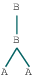

In [87]:
prune(tree,3)

In [3]:
def clean_tree(tree):
    """Returns a tree without any digits"""
    strtree=str(tree)
    match=re.findall(r'[^0-9]+',str(strtree))
    strtree=''.join(match)
    return Tree.fromstring(strtree)

def TreeKernel(T1,T2,const=1,rho=1):
    '''returns the number of common subset tree if rho=1 and common 
        subtrees if rho=0.
        const balances the contribution of subtrees: small values
        decay the contribution of lower nodes in large subtrees.'''
    K=0
    for t1 in T1.subtrees():
        for t2 in T2.subtrees():
            K+=delta(t1,t2,const,rho)
    return K


def same_root(T1,T2):
    '''returns true only if the label of the root nodes are the same.'''
    return T1.label()==T2.label()

def pre(T):
    '''returns true only if root of T is a preterminal node.'''
    return T.height()<=2

def delta(T1,T2,const=1,rho=1):
    '''returns the number of common subset trees if rho=1 and common 
        subtrees if rho=0 containing their root.
        const balances the contribution of subtrees: small values
        decay the contribution of lower nodes in large subtrees.'''
    if not same_root(T1,T2):
        return 0
    if(pre(T1) and pre(T2) and T1==T2):
        return const
    if(not(pre(T1)) and not(pre(T2)) and same_root(T1,T2)):
        return const*(rho+delta(T1[0],T2[0]))*(rho+delta(T1[1],T2[1]))
    return 1


print delta(tree,tree)
print TreeKernel(tree,tree,rho=1)

244
452


## Random Tree Generator

In [74]:
def g_aux(labels,depth,s):
    if(depth==0):
        return ''
    if(np.random.rand(1)[0]<0.6):
        label1,label2=np.random.choice(labels,2)
        str1='( '+label1+' '+g_aux(labels,depth-1,s)+' )'
        str2='( '+label2+' '+g_aux(labels,depth-1,s)+' )'
        return str1+str2
    if(np.random.rand(1)[0]<0.5):
        label=np.random.choice(labels)
        return '('+label+' '+g_aux(labels,depth-1,s)+' )'
    if(np.random.rand(1)[0]<0.6):
        return g_aux(labels,depth-1,s)
    else:
        return ''
    
def gen_rand_tree(labels=['A','B','C'],maxdepth=4):
    label=np.random.choice(labels)
    return Tree.fromstring('( '+label+' '+g_aux(labels,maxdepth,'')+' )')

def gen_rand_tree_list(ntrees=10,labels=['A','B'],maxdepth=4):
    k=0
    list_tree=[]
    min_nodes=3
    while(k<ntrees):
        t=gen_rand_tree(labels,maxdepth)        
        if(len(str(t))>=4*min_nodes): #test if tree has more that min_nodes
            list_tree.append(t)
            k+=1
    return list_tree

In [76]:
print gen_rand_tree(maxdepth=3)

(B (A (B )))


In [27]:
l = [(t.height(),t.label()) for i,t in enumerate(tree.subtrees()) if(t.label() != 'EDU')]
print l
print ''
l = [(i,v[3:]) for i,v in l]
print l

[(6, 'NN-textualorganization'), (5, 'SN-purpose'), (4, 'NS-elaboration'), (3, 'NS-temporal'), (4, 'NS-elaboration'), (3, 'NS-elaboration')]

[(6, 'textualorganization'), (5, 'purpose'), (4, 'elaboration'), (3, 'temporal'), (4, 'elaboration'), (3, 'elaboration')]


# Classification
## Classe abstraite

### SVM
#### linear

In [8]:
from sklearn import svm
clf = svm.LinearSVC()
#clf.fit(X,y)

#### with rbf kernel

In [ ]:
clf = svm.SVC(kernel=kernels.rbf_kernel)
#clf.fit(X,y)

### KNN

In [10]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier()
#clf.fit(X,y)

### MaxEnt

In [11]:
from sklearn import linear_model
clf = linear_model.LogisticRegression()
#clf.fit(X,y)

### Random Forest

In [12]:
from sklearn import ensemble
clf = ensemble.RandomForestClassifier()
#clf.fit(X,y)

## Scores: Récapitulatif

In [4]:
import pandas as pd
data=[]
results=[]

d={}



#bayes=models.Bayes()
#d['Naive Bayes']=models.cross_validation(bayes,x,y2,8)


print(data)
results.append(d)    

df=pd.DataFrame(results) #index=dataset
df.to_csv("results1.csv")

[]
